In [4]:
import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam 
from keras.callbacks import ModelCheckpoint 
import numpy as np
import matplotlib.pyplot as plt
from imutils import paths 
import os

In [5]:
train_data="/content/drive/MyDrive/Colab Notebooks/DataSets/training"
vali_data="/content/drive/MyDrive/Colab Notebooks/DataSets/validation"


In [6]:
path=list(paths.list_images("/content/drive/MyDrive/Colab Notebooks/DataSets/validation"))
label=[]

for (i, image_path) in enumerate(path):
    lab = image_path.split(os.path.sep)[-2].split(".")[0]
    label.append(lab)
y = np.array(label)


In [7]:
training_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode='nearest')

training_data=training_datagen.flow_from_directory(train_data,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode='binary')
                                                

Found 730 images belonging to 2 classes.


In [35]:
pre=training_data.class_indices
pre

{'bacterial_blight': 0, 'curl_virus': 1}

In [52]:
x = np.char.replace(y, 'curl_virus', "1")
actualdata=(np.char.replace(x, 'bacterial_blight', "0"))
ydata=[]
for (i,d) in enumerate(actualdata):
  k=int(d)
  ydata.append(k)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [61]:
valid_data

In [66]:
valid_datagen=ImageDataGenerator()
valid_data=valid_datagen.flow_from_directory(vali_data,
                                             target_size=(150,150),
                                             #batch_size=32,
                                             class_mode='binary')

Found 135 images belonging to 2 classes.


In [57]:
model_path='/content/drive/MyDrive/Colab Notebooks/ model11.h5'
checkpoint=ModelCheckpoint(model_path,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
callbacks_list=[checkpoint]


In [12]:
modelfinal=keras.models.Sequential([
                              keras.layers.Conv2D(filters=32,kernel_size=3,input_shape=[150,150,3]),
                              keras.layers.MaxPooling2D(pool_size=(2,2)),
                              keras.layers.Conv2D(filters=64,kernel_size=3),
                              keras.layers.MaxPooling2D(pool_size=(2,2)),
                              keras.layers.Conv2D(filters=128,kernel_size=3),
                              keras.layers.MaxPooling2D(pool_size=(2,2)),

                              keras.layers.Dropout(0.5),
                              keras.layers.Flatten(),
                              keras.layers.Dense(units=128,activation='relu'),
                              keras.layers.Dropout(0.1),
                              keras.layers.Dense(units=256,activation='relu'),
                              keras.layers.Dropout(0.25),
                              keras.layers.Dense(units=32,activation='softmax'),
])

In [13]:
modelfinal.compile(optimizer=Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [14]:
modelfinal.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [15]:
training=modelfinal.fit(training_data,
                   epochs=10,
                   verbose=1,
                   validation_data=valid_data,
                   callbacks=callbacks_list
                   )

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 1.6558 - accuracy: 0.4959
Epoch 1: val_accuracy improved from -inf to 0.62222, saving model to /content/drive/MyDrive/Colab Notebooks/ model11.h5
23/23 [==============================] - 96s 4s/step - loss: 1.6558 - accuracy: 0.4959 - val_loss: 0.6763 - val_accuracy: 0.6222
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 0.9870 - accuracy: 0.5137
Epoch 2: val_accuracy improved from 0.62222 to 0.63704, saving model to /content/drive/MyDrive/Colab Notebooks/ model11.h5
23/23 [==============================] - 11s 466ms/step - loss: 0.9870 - accuracy: 0.5137 - val_loss: 0.6900 - val_accuracy: 0.6370
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.8394 - accuracy: 0.5753
Epoch 3: val_accuracy improved from 0.63704 to 0.64444, saving model to /content/drive/MyDrive/Colab Notebooks/ model11.h5
23/23 [==============================] - 10s 457ms/step - loss: 0.8394 - accuracy: 0.5753 -

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
modelfinal.evaluate(valid_data)

5/5 [==============================] - 1s 236ms/step - loss: 0.5446 - accuracy: 0.6889


[0.5446435809135437, 0.6888889074325562]

In [43]:
modelfinal.save('/content/drive/MyDrive/Colab Notebooks/ almostready4.h5')

In [71]:
pred=modelfinal.predict(valid_data)
y_classes = pred.argmax(axis=-1)
actualdata=y_classes

In [72]:
print(y_classes)

[1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0
 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1
 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0
 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1]


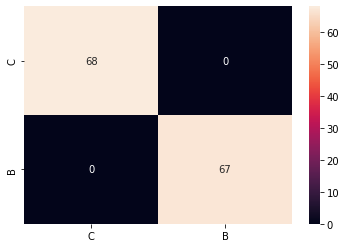

In [76]:
from sklearn.metrics import confusion_matrix
gar=confusion_matrix(y_classes,actualdata)
import seaborn as ss
ss.heatmap(gar,annot=True,xticklabels="CB",yticklabels="CB")